## Data Preprocessing

In [228]:
import pandas as pd

df = pd.read_csv('lead1.0-small.csv', header=0)


In [229]:
df

,building_id,timestamp,meter_reading,anomaly
0,1,2016-01-01 00:00:00,NaN,0
1,32,2016-01-01 00:00:00,NaN,0
2,41,2016-01-01 00:00:00,NaN,0
3,55,2016-01-01 00:00:00,NaN,0
4,69,2016-01-01 00:00:00,NaN,0
...,...,...,...,...
1749489,1316,2016-12-31 23:00:00,38.844,0
1749490,1318,2016-12-31 23:00:00,202.893,0
1749491,1319,2016-12-31 23:00:00,NaN,0
1749492,1323,2016-12-31 23:00:00,172.000,0


In [230]:
df.count

<bound method DataFrame.count of          building_id            timestamp  meter_reading  anomaly
0                  1  2016-01-01 00:00:00            NaN        0
1                 32  2016-01-01 00:00:00            NaN        0
2                 41  2016-01-01 00:00:00            NaN        0
3                 55  2016-01-01 00:00:00            NaN        0
4                 69  2016-01-01 00:00:00            NaN        0
...              ...                  ...            ...      ...
1749489         1316  2016-12-31 23:00:00         38.844        0
1749490         1318  2016-12-31 23:00:00        202.893        0
1749491         1319  2016-12-31 23:00:00            NaN        0
1749492         1323  2016-12-31 23:00:00        172.000        0
1749493         1353  2016-12-31 23:00:00          2.400        0

[1749494 rows x 4 columns]>

In [231]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

df.dropna(inplace=True)

Missing values in each column:
 building_id           0
timestamp             0
meter_reading    107653
anomaly               0
dtype: int64


In [232]:
len(df)

1641841

## Feature Engineering

In [233]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [234]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 building_id      0
timestamp        0
meter_reading    0
anomaly          0
dtype: int64


In [235]:
# Creating time-based features
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['Hour'] = df['timestamp'].dt.hour
df['Day_of_week'] = df['timestamp'].dt.dayofweek

In [236]:
df_hourly = df.resample('H', on='timestamp').mean()

In [237]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()

features_to_scale = ['meter_reading','Year','Month','Day','Hour','Day_of_week']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [238]:
df['lag_1'] = df['meter_reading'].shift(1)
df['lag_24'] = df['meter_reading'].shift(24)  # Lag of 24 hours (1 day)
df['lag_168'] = df['meter_reading'].shift(168)  # Lag of 168 hours (1 week)
df['rolling_mean_24'] = df['meter_reading'].rolling(window=24).mean()
df['rolling_std_24'] = df['meter_reading'].rolling(window=24).std()

In [239]:
df

,building_id,timestamp,meter_reading,anomaly,Year,Month,Day,Hour,Day_of_week,lag_1,lag_24,lag_168,rolling_mean_24,rolling_std_24
8,107,2016-01-01 00:00:00,0.026556,1,0.0,0.0,0.0,0.0,0.666667,NaN,NaN,NaN,NaN,NaN
10,111,2016-01-01 00:00:00,0.025374,1,0.0,0.0,0.0,0.0,0.666667,0.026556,NaN,NaN,NaN,NaN
11,112,2016-01-01 00:00:00,0.001558,0,0.0,0.0,0.0,0.0,0.666667,0.025374,NaN,NaN,NaN,NaN
12,117,2016-01-01 00:00:00,0.002472,0,0.0,0.0,0.0,0.0,0.666667,0.001558,NaN,NaN,NaN,NaN
13,118,2016-01-01 00:00:00,0.017766,0,0.0,0.0,0.0,0.0,0.666667,0.002472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749488,1315,2016-12-31 23:00:00,0.004930,0,0.0,1.0,1.0,1.0,0.833333,0.003540,0.027166,0.019327,0.032291,0.051508
1749489,1316,2016-12-31 23:00:00,0.005888,0,0.0,1.0,1.0,1.0,0.833333,0.004930,0.139100,0.009110,0.026740,0.046425
1749490,1318,2016-12-31 23:00:00,0.030756,0,0.0,1.0,1.0,1.0,0.833333,0.005888,0.018948,0.001323,0.027232,0.046401
1749492,1323,2016-12-31 23:00:00,0.026073,0,0.0,1.0,1.0,1.0,0.833333,0.030756,0.005333,0.000693,0.028096,0.046168


In [240]:
# Droping NaN values caused by lag and rolling calculations to clean the data for modeling
df.dropna(inplace=True)

# Defining the features (X) and target variable (y) for the model
X = df.drop(columns=['meter_reading','building_id'])
y = df['meter_reading']

# Spliting the data into training and testing sets to evaluate the model's performance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [241]:
df = df.drop(df.index[-1])

In [242]:
len(df)

1641672

## Exploratory Data Analysis (EDA)

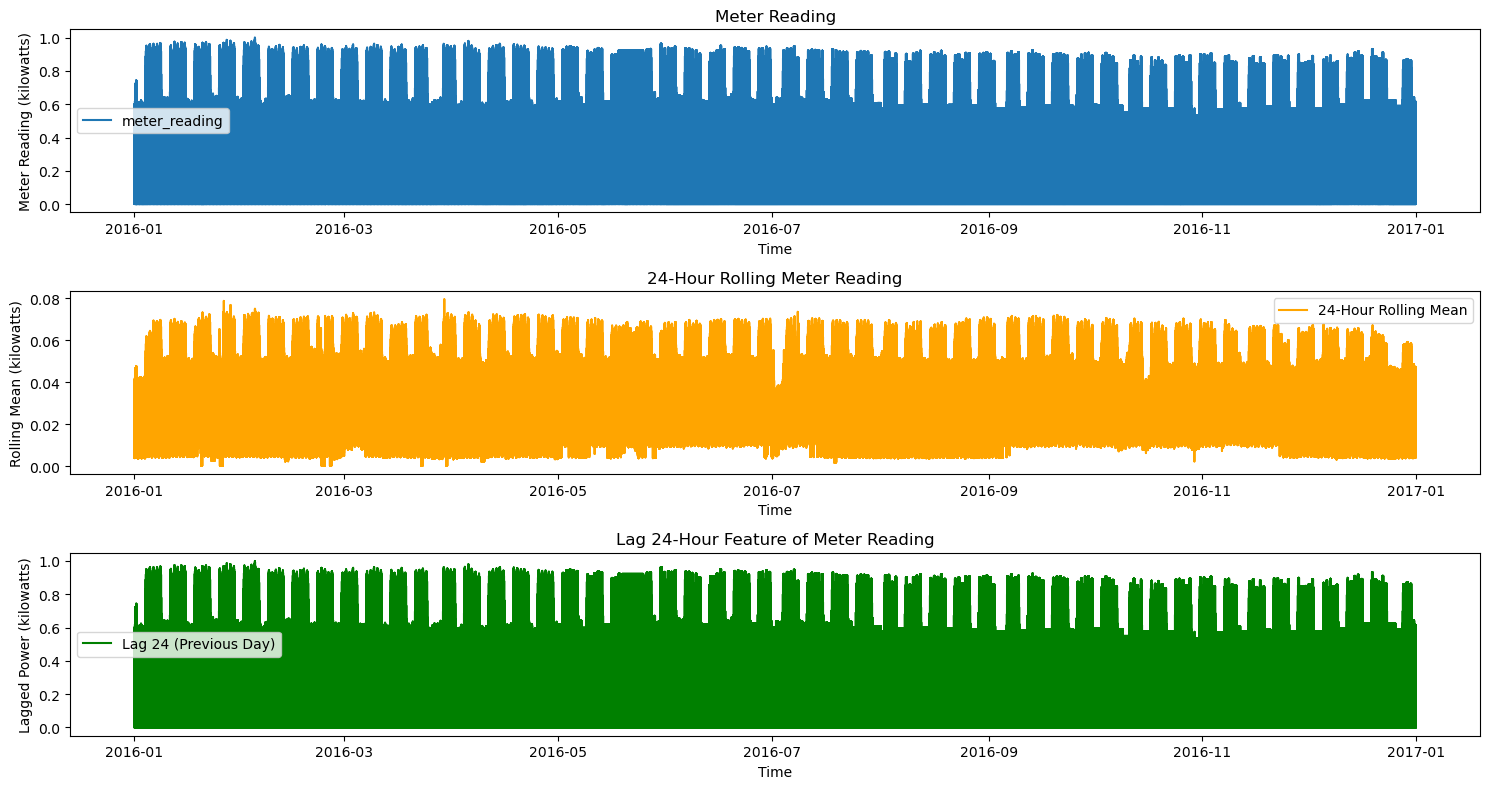

In [243]:
# Visualizing the processed data to better understand the trends and patterns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Ploting meter Reading
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['meter_reading'], label='meter_reading')
plt.title('Meter Reading')
plt.xlabel('Time')
plt.ylabel('Meter Reading (kilowatts)')
plt.legend()

# Ploting Rolling Mean
plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['rolling_mean_24'], label='24-Hour Rolling Mean', color='orange')
plt.title('24-Hour Rolling Meter Reading')
plt.xlabel('Time')
plt.ylabel('Rolling Mean (kilowatts)')
plt.legend()

# Ploting Lag Feature
plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['lag_24'], label='Lag 24 (Previous Day)', color='green')
plt.title('Lag 24-Hour Feature of Meter Reading')
plt.xlabel('Time')
plt.ylabel('Lagged Power (kilowatts)')
plt.legend()

plt.tight_layout()
plt.show()


## Hybrid SWT + LSTM Model for Energy Forecasting

In [244]:
import pywt
import numpy as np

# Function to apply Stationary Wavelet Transform (SWT) to the data
def apply_swt(data, wavelet='db1'):
    # Calculating the maximum level based on the length of the data
    max_level = pywt.swt_max_level(len(data))
    
    # Applying SWT with the maximum allowable level to decompose the time series
    coeffs = pywt.swt(data, wavelet, level=max_level)
    approx_coeffs, detail_coeffs = zip(*coeffs)
    return np.array(approx_coeffs), np.array(detail_coeffs)
# Ensureing the data length is even by padding it, as SWT requires even-length data
data = df['meter_reading'].values
print(len(data))
if len(data) % 2 != 0:
    data = np.append(data, data[-1])  # Pad with the last value to make the length even

# Apply SWT to the padded data with a valid decomposition level
approx_coeffs, detail_coeffs = apply_swt(data)

1641672


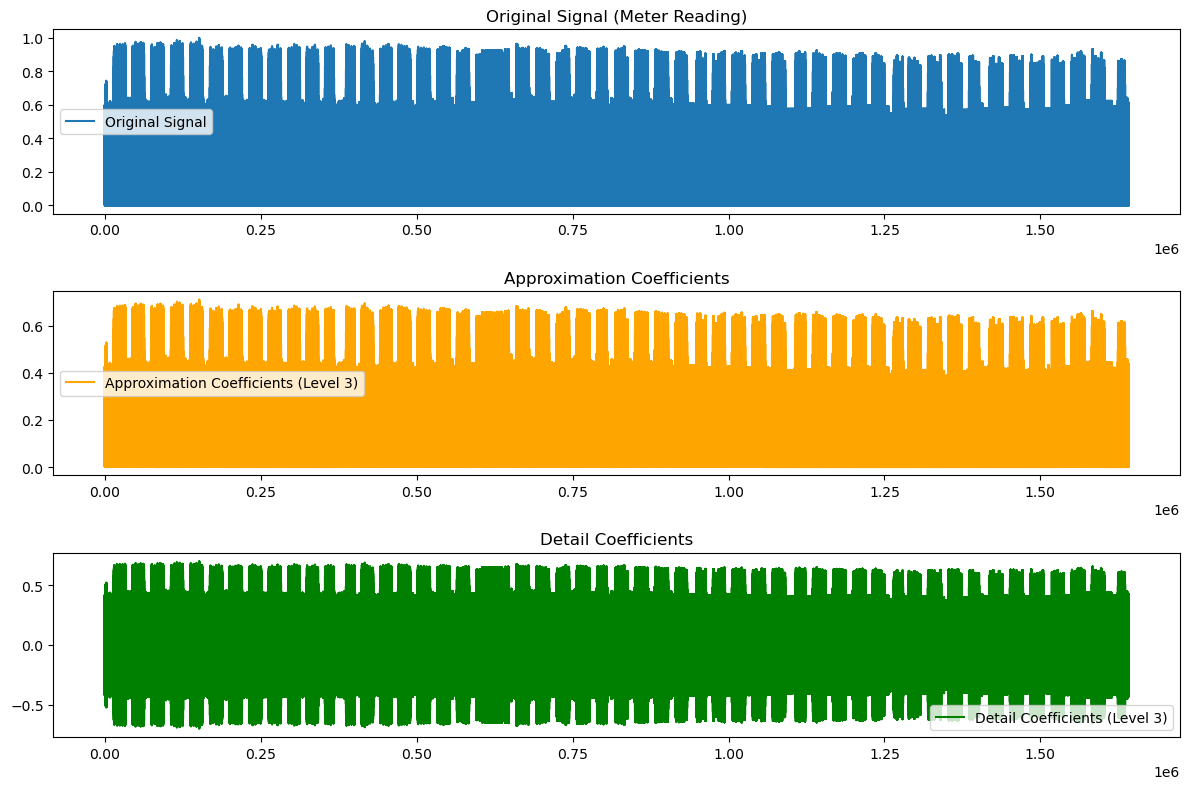

In [245]:
import matplotlib.pyplot as plt


# Plot the original signal and its approximation coefficients
plt.figure(figsize=(12, 8))

# Plot the original signal
plt.subplot(3, 1, 1)
plt.plot(data, label='Original Signal')
plt.title('Original Signal (Meter Reading)')
plt.legend()

# Plot the approximation coefficients (trend)
plt.subplot(3, 1, 2)
plt.plot(approx_coeffs[-1], label='Approximation Coefficients (Level {})'.format(len(approx_coeffs)), color='orange')
plt.title('Approximation Coefficients')
plt.legend()

# Plot the detail coefficients (noise)
plt.subplot(3, 1, 3)
plt.plot(detail_coeffs[-1], label='Detail Coefficients (Level {})'.format(len(detail_coeffs)), color='green')
plt.title('Detail Coefficients')
plt.legend()

plt.tight_layout()
plt.show()


In [246]:
approx_coeffs.shape

(3, 1641672)

In [247]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

 # Using the first level of approximate coefficients for training the LSTM model
approx_coeffs_level1 = approx_coeffs[0]  # Selecting the first level of decomposition

print(approx_coeffs_level1)

 # Creating sequences for LSTM input, using the past 24 hours to predict the next hour
sequence_length = 24
X, y = [], []
for i in range(len(approx_coeffs_level1) - sequence_length):
     X.append(approx_coeffs_level1[i:i + sequence_length])
     y.append(approx_coeffs_level1[i + sequence_length])

X = np.array(X)
y = np.array(y)



# # Spliting the data into training and testing sets (80% train, 20% test) for evaluation
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(X_train)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape(-1, 1)  # Reshape to (batch, 1)
y_test = y_test.reshape(-1, 1)   

# Checking the shapes of the training and testing datasets
print(f"X_train shape: {X_train_reshaped.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test_reshaped.shape}, y_test shape: {y_test.shape}")


[0.06713714 0.03937547 0.03889742 ... 0.08606208 0.08404244 0.07327365]
[[0.06713714 0.03937547 0.03889742 ... 0.02063549 0.02062477 0.0088609 ]
 [0.03937547 0.03889742 0.04831763 ... 0.02062477 0.0088609  0.00850718]
 [0.03889742 0.04831763 0.02870706 ... 0.0088609  0.00850718 0.00553808]
 ...
 [0.09549048 0.08877087 0.08003185 ... 0.02702979 0.02635665 0.02053098]
 [0.08877087 0.08003185 0.07362576 ... 0.02635665 0.02053098 0.02308206]
 [0.08003185 0.07362576 0.07499187 ... 0.02053098 0.02308206 0.02300703]]
X_train shape: (1149153, 24, 1), y_train shape: (1149153, 1)
X_test shape: (492495, 24, 1), y_test shape: (492495, 1)


In [248]:
import numpy as np
import tensorflow as tf
import random

# Set random seed for reproducibility
random_seed = 123
np.random.seed(random_seed)
tf.random.set_seed(random_seed)
random.seed(random_seed)

# Define the model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
# Adding LSTM with L2 regularization
model.add(LSTM(15, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization term
# Adding the output layer
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Defining early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model with Early Stopping
history = model.fit(
    X_train_reshaped, y_train,
    epochs=5,  
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[early_stopping]  # Adding EarlyStopping to callbacks
)


# Building the LSTM model for time-series forecasting
# model = Sequential()
# model.add(LSTM(10, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
# model.add(Dense(1))  # Output layer to predict the next energy consumption value
# model.compile(optimizer='adam', loss='mse')  # Compile the model with mean squared error loss

# # Training the model using the training data
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
35912/35912 ━━━━━━━━━━━━━━━━━━━━ 157s 4ms/step - loss: 0.0019 - val_loss: 8.4782e-04
Epoch 2/5
35912/35912 ━━━━━━━━━━━━━━━━━━━━ 158s 4ms/step - loss: 8.7837e-04 - val_loss: 7.1073e-04
Epoch 3/5
35912/35912 ━━━━━━━━━━━━━━━━━━━━ 159s 4ms/step - loss: 7.2580e-04 - val_loss: 6.0888e-04
Epoch 4/5
35912/35912 ━━━━━━━━━━━━━━━━━━━━ 158s 4ms/step - loss: 6.2769e-04 - val_loss: 5.8683e-04
Epoch 5/5
35912/35912 ━━━━━━━━━━━━━━━━━━━━ 159s 4ms/step - loss: 5.8151e-04 - val_loss: 5.6321e-04


In [249]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Generating predictions using the LSTM model
y_pred = model.predict(X_test_reshaped)




15391/15391 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step


In [250]:
y_pred

array([[0.02482408],
       [0.01486783],
       [0.01194763],
       ...,
       [0.08287884],
       [0.08907956],
       [0.0872492 ]], dtype=float32)

In [251]:


# Calculating RMSE and MAE to assess model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}")

RMSE: 0.022021409005747408, MAE: 0.01247147017186166


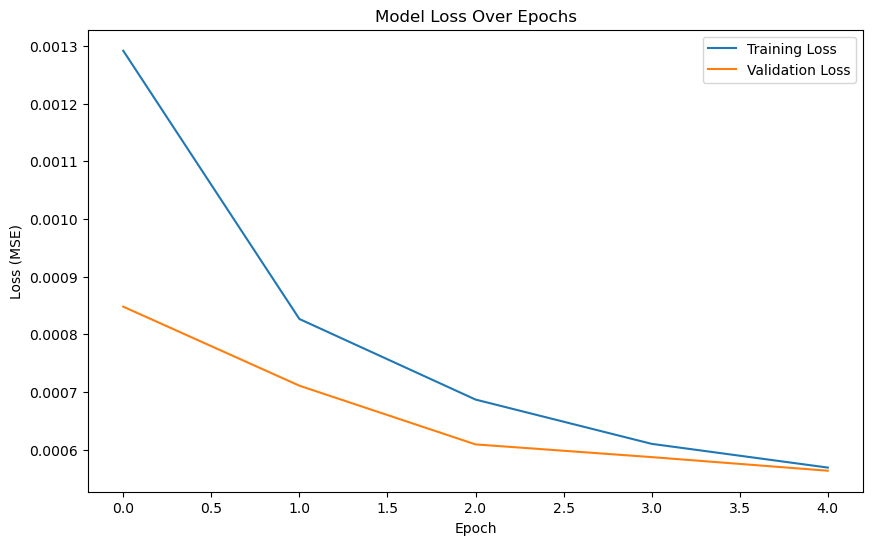

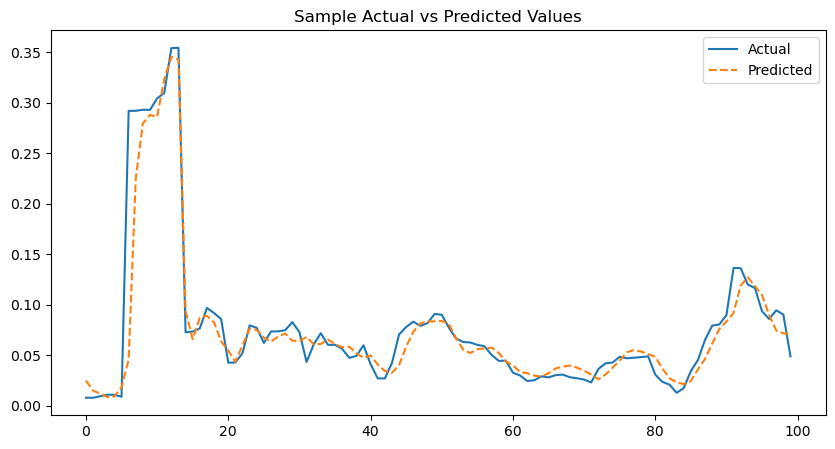

In [252]:
# Ploting the training and validation loss over epochs to visualize the model's learning process
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Ploting the actual vs predicted values for better visual understanding of the model's performance
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Sample Actual vs Predicted Values")
plt.show()


## Anomaly Detection Anomaly Detection Using AI Methods

In [253]:
train_predictions = model.predict(X_train_reshaped).flatten()  # Flatten to get a 1D array
test_predictions = model.predict(X_test_reshaped).flatten()

35912/35912 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step
15391/15391 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step


In [254]:
all_predictions = np.concatenate([train_predictions, test_predictions])

In [255]:
start_index = sequence_length  # Because the first `sequence_length` values were used for the initial window

# Ensuring that the length of the range matches the number of predictions
end_index = start_index + len(all_predictions)

In [256]:
print(end_index)
len(df)

1641672


1641672

In [257]:
df['predicted'] = np.nan



In [258]:
end_index

1641672

In [259]:
all_predictions.size

1641648

In [260]:
len(df)

1641672

In [261]:
expected_length = len(all_predictions)
actual_length = end_index - start_index



In [262]:
actual_length

1641648

In [263]:
expected_length

1641648

In [264]:
# Debugging: Checking the lengths of start_index, end_index, and all_predictions
print(f"start_index: {start_index}")
print(f"end_index: {end_index}")
print(f"Expected length (end_index - start_index): {end_index - start_index}")
print(f"Length of all_predictions: {len(all_predictions)}")

# Checking the indices of the DataFrame slice
# Useing iloc for position-based indexing to avoid label-based issues
# Adjusting the end_index calculation if necessary
try:
    # Using iloc to set values positionally
    df.iloc[start_index:end_index, df.columns.get_loc('predicted')] = all_predictions
except ValueError as e:
    print(f"Error: {e}")

# Verifying the slice length before assignment
slice_length = len(df.iloc[start_index:end_index])
print(f"Actual slice length: {slice_length}")
if slice_length != len(all_predictions):
    print("The lengths do not match. Adjusting the slice...")

# Correcting length mismatch by trimming predictions or adjusting indices
if slice_length > len(all_predictions):
    df.iloc[start_index:start_index + len(all_predictions), df.columns.get_loc('predicted')] = all_predictions
elif slice_length < len(all_predictions):
    all_predictions = all_predictions[:slice_length]
    df.iloc[start_index:end_index, df.columns.get_loc('predicted')] = all_predictions


start_index: 24
end_index: 1641672
Expected length (end_index - start_index): 1641648
Length of all_predictions: 1641648
Actual slice length: 1641648


In [265]:
df

,building_id,timestamp,meter_reading,anomaly,Year,Month,Day,Hour,Day_of_week,lag_1,lag_24,lag_168,rolling_mean_24,rolling_std_24,predicted
245,293,2016-01-01 01:00:00,0.095688,0,0.0,0.0,0.0,0.043478,0.666667,0.003872,0.008508,0.026556,0.019563,0.019881,NaN
246,312,2016-01-01 01:00:00,0.001504,0,0.0,0.0,0.0,0.043478,0.666667,0.095688,0.021847,0.025374,0.018715,0.020210,NaN
247,318,2016-01-01 01:00:00,0.025370,0,0.0,0.0,0.0,0.043478,0.666667,0.001504,0.014295,0.001558,0.019177,0.020231,NaN
248,335,2016-01-01 01:00:00,0.057779,0,0.0,0.0,0.0,0.043478,0.666667,0.025370,0.016099,0.002472,0.020914,0.021692,NaN
249,345,2016-01-01 01:00:00,0.000364,0,0.0,0.0,0.0,0.043478,0.666667,0.057779,0.001810,0.017766,0.020853,0.021749,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749487,1311,2016-12-31 23:00:00,0.003540,0,0.0,1.0,1.0,1.000000,0.833333,0.001925,0.007523,0.018001,0.033217,0.051194,0.057443
1749488,1315,2016-12-31 23:00:00,0.004930,0,0.0,1.0,1.0,1.000000,0.833333,0.003540,0.027166,0.019327,0.032291,0.051508,0.067135
1749489,1316,2016-12-31 23:00:00,0.005888,0,0.0,1.0,1.0,1.000000,0.833333,0.004930,0.139100,0.009110,0.026740,0.046425,0.082879
1749490,1318,2016-12-31 23:00:00,0.030756,0,0.0,1.0,1.0,1.000000,0.833333,0.005888,0.018948,0.001323,0.027232,0.046401,0.089080


In [266]:
df['predicted'].fillna(df['predicted'].mean(), inplace=True)

In [267]:
# Features and labels for resampling
unsupervised_features = ['meter_reading', 'predicted']
X_unsupervised = df[unsupervised_features]
y_unsupervised = df['anomaly']

# Applying SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_unsupervised, y_unsupervised)

# Spliting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Residual-Based Anomaly Detection Confusion Matrix (SMOTE-Resampled Data):
[[1559074   45315]
 [1557335   47054]]

Residual-Based Anomaly Detection Classification Report (SMOTE-Resampled Data):
              precision    recall  f1-score   support

           0       0.50      0.97      0.66   1604389
           1       0.51      0.03      0.06   1604389

    accuracy                           0.50   3208778
   macro avg       0.50      0.50      0.36   3208778
weighted avg       0.50      0.50      0.36   3208778



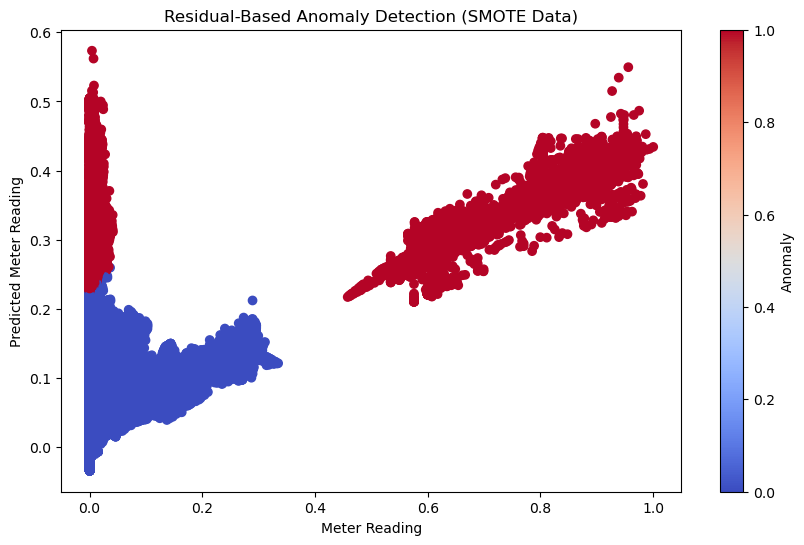

In [268]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt



# Applying SMOTE to oversample the minority class 
unsupervised_features = ['meter_reading', 'predicted']
X_unsupervised = df[unsupervised_features]
y_unsupervised = df['anomaly']

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_unsupervised, y_unsupervised)

# Calculating residuals (absolute difference between actual and predicted meter readings)
# Using resampled data
X_resampled['residuals'] = np.abs(X_resampled['meter_reading'] - X_resampled['predicted'])

# Seting a threshold for anomaly detection based on residuals
# Using mean + 3 * standard deviation as the threshold for residuals
threshold = X_resampled['residuals'].mean() + 3 * X_resampled['residuals'].std()

# Detecting anomalies based on residuals exceeding the threshold
X_resampled['residual_anomaly'] = X_resampled['residuals'].apply(lambda x: 1 if x > threshold else 0)

# Evaluating residuals-based anomaly detection on resampled data
print("Residual-Based Anomaly Detection Confusion Matrix (SMOTE-Resampled Data):")
print(confusion_matrix(y_resampled, X_resampled['residual_anomaly']))
print("\nResidual-Based Anomaly Detection Classification Report (SMOTE-Resampled Data):")
print(classification_report(y_resampled, X_resampled['residual_anomaly']))

#  Visualization of residuals and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X_resampled['meter_reading'], X_resampled['predicted'], c=X_resampled['residual_anomaly'], cmap='coolwarm')
plt.title('Residual-Based Anomaly Detection (SMOTE Data)')
plt.xlabel('Meter Reading')
plt.ylabel('Predicted Meter Reading')
plt.colorbar(label='Anomaly')
plt.show()



In [269]:
unsupervised_features = ['meter_reading', 'predicted',]
X_unsupervised = df[unsupervised_features]
len(X_unsupervised)

1641672

In [270]:
len(df['anomaly'])

1641672

Isolation Forest Confusion Matrix:
[[285273  35615]
 [291797  29071]]

Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.89      0.64    320888
           1       0.45      0.09      0.15    320868

    accuracy                           0.49    641756
   macro avg       0.47      0.49      0.39    641756
weighted avg       0.47      0.49      0.39    641756


Best LOF n_neighbors: 15
Best LOF contamination: 0.1
Best LOF Accuracy: 0.5236974800391426

Best LOF Confusion Matrix:
[[296399  24489]
 [281181  39687]]

Best LOF Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.92      0.66    320888
           1       0.62      0.12      0.21    320868

    accuracy                           0.52    641756
   macro avg       0.57      0.52      0.43    641756
weighted avg       0.57      0.52      0.43    641756



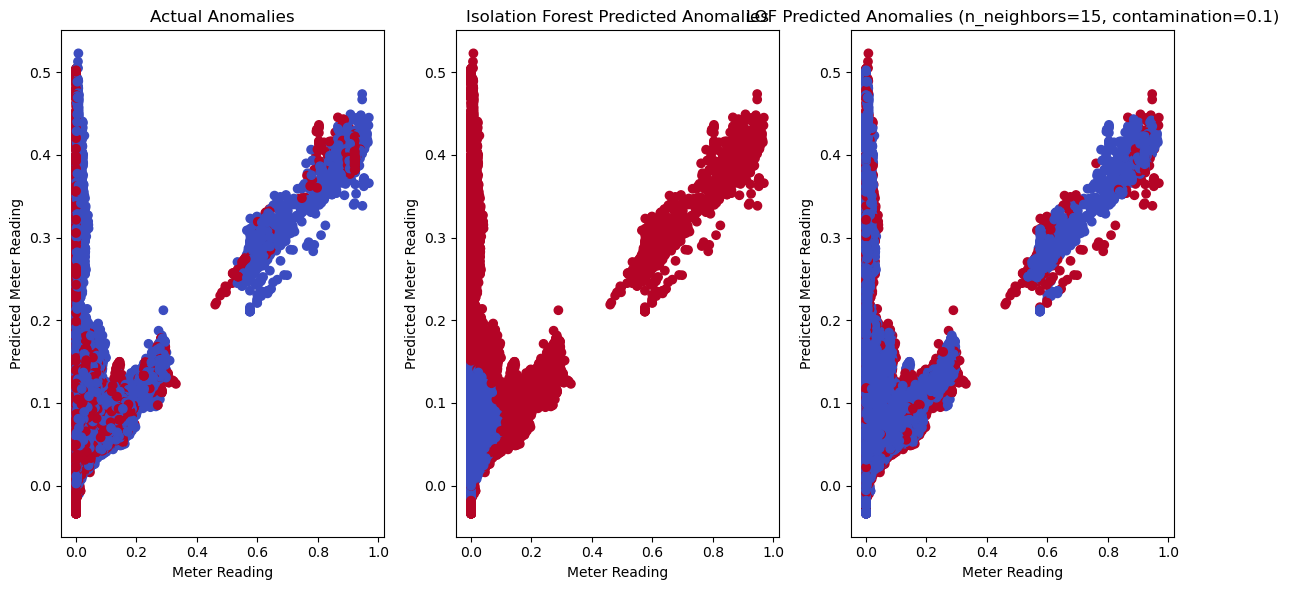

In [271]:


# Using Isolation Forest on the resampled data
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]  # Convert -1 (anomaly) to 1 and 1 (normal) to 0

# Fine-tuning Local Outlier Factor (LOF) on the resampled data with different parameters
best_n_neighbors = None
best_contamination = None
best_accuracy = 0
best_report = None
best_y_pred_lof = None

# Try different values for n_neighbors and contamination
for n_neighbors in [10, 15, 20, 25, 30]:
    for contamination in [0.05, 0.07, 0.1]:
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
        y_pred_lof = lof.fit_predict(X_test)
        y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]  # Convert -1 (anomaly) to 1 and 1 (normal) to 0
        
        # Evaluate LOF
        report = classification_report(y_test, y_pred_lof, output_dict=True)
        accuracy = report['accuracy']
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_neighbors = n_neighbors
            best_contamination = contamination
            best_report = report
            best_y_pred_lof = y_pred_lof

# Evaluation for Isolation Forest
print("Isolation Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_iso))
print("\nIsolation Forest Classification Report:")
print(classification_report(y_test, y_pred_iso))

# Best LOF Model Results
print(f"\nBest LOF n_neighbors: {best_n_neighbors}")
print(f"Best LOF contamination: {best_contamination}")
print(f"Best LOF Accuracy: {best_accuracy}\n")
print("Best LOF Confusion Matrix:")
print(confusion_matrix(y_test, best_y_pred_lof))
print("\nBest LOF Classification Report:")
print(classification_report(y_test, best_y_pred_lof))

# Visualization
plt.figure(figsize=(12, 6))

# Ploting actual anomalies
plt.subplot(1, 3, 1)
plt.scatter(X_test['meter_reading'], X_test['predicted'], c=y_test, cmap='coolwarm')
plt.title('Actual Anomalies')
plt.xlabel('Meter Reading')
plt.ylabel('Predicted Meter Reading')

# Ploting Isolation Forest predicted anomalies
plt.subplot(1, 3, 2)
plt.scatter(X_test['meter_reading'], X_test['predicted'], c=y_pred_iso, cmap='coolwarm')
plt.title('Isolation Forest Predicted Anomalies')
plt.xlabel('Meter Reading')
plt.ylabel('Predicted Meter Reading')

# Ploting best LOF predicted anomalies
plt.subplot(1, 3, 3)
plt.scatter(X_test['meter_reading'], X_test['predicted'], c=best_y_pred_lof, cmap='coolwarm')
plt.title(f'LOF Predicted Anomalies (n_neighbors={best_n_neighbors}, contamination={best_contamination})')
plt.xlabel('Meter Reading')
plt.ylabel('Predicted Meter Reading')

plt.tight_layout()
plt.show()


Epoch 1/10


c:\Users\glawi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8022/8022 ━━━━━━━━━━━━━━━━━━━━ 7s 826us/step - loss: 2.0805e-04 - val_loss: 1.0194e-06
Epoch 2/10
8022/8022 ━━━━━━━━━━━━━━━━━━━━ 7s 838us/step - loss: 9.2088e-07 - val_loss: 8.6309e-07
Epoch 3/10
8022/8022 ━━━━━━━━━━━━━━━━━━━━ 6s 784us/step - loss: 8.7796e-07 - val_loss: 8.5782e-07
Epoch 4/10
8022/8022 ━━━━━━━━━━━━━━━━━━━━ 7s 833us/step - loss: 8.7385e-07 - val_loss: 8.4586e-07
Epoch 5/10
8022/8022 ━━━━━━━━━━━━━━━━━━━━ 7s 843us/step - loss: 8.6864e-07 - val_loss: 8.4353e-07
Epoch 6/10
8022/8022 ━━━━━━━━━━━━━━━━━━━━ 7s 857us/step - loss: 8.6740e-07 - val_loss: 8.4263e-07
Epoch 7/10
8022/8022 ━━━━━━━━━━━━━━━━━━━━ 7s 835us/step - loss: 8.6623e-07 - val_loss: 8.4209e-07
Epoch 8/10
8022/8022 ━━━━━━━━━━━━━━━━━━━━ 7s 806us/step - loss: 8.6534e-07 - val_loss: 8.4175e-07
Epoch 9/10
8022/8022 ━━━━━━━━━━━━━━━━━━━━ 7s 842us/step - loss: 8.6483e-07 - val_loss: 8.4157e-07
Epoch 10/10
8022/8022 ━━━━━━━━━━━━━━━━━━━━ 7s 808us/step - loss: 8.6412e-07 - val_loss: 8.4152e-07
20055/20055 ━━━━━━━━━━━━━━━━━━

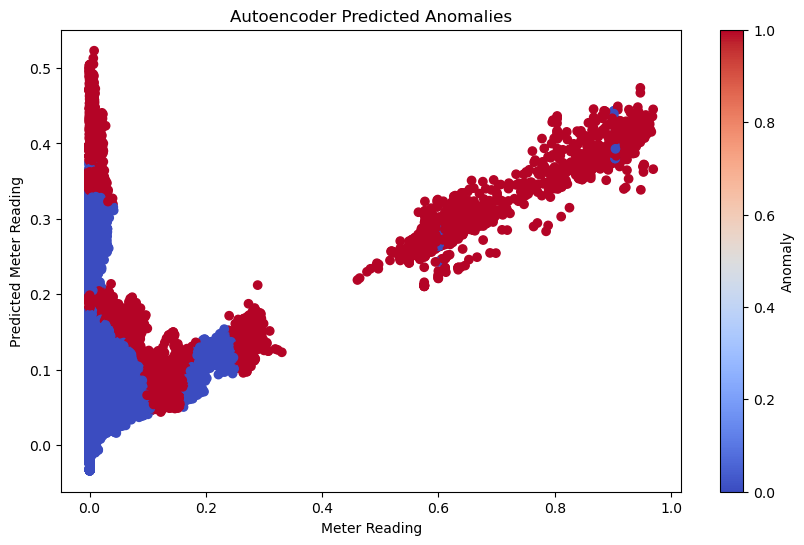

In [272]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Building the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 16 

autoencoder = Sequential([
    Dense(encoding_dim, activation='relu', input_shape=(input_dim,)),
    Dense(input_dim, activation='tanh')  
])

autoencoder.compile(optimizer='adam', loss='mse')

# Training the autoencoder on the resampled training data
history = autoencoder.fit(X_train, X_train, 
                          epochs=10, 
                          batch_size=256, 
                          validation_split=0.2, 
                          verbose=1)


reconstructed_data = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(X_test - reconstructed_data), axis=1)

# Seting a threshold for anomaly detection based on reconstruction error
threshold = np.percentile(reconstruction_error, 95)

# Detect anomalies where reconstruction error exceeds the threshold
y_pred_autoencoder = reconstruction_error > threshold
y_pred_autoencoder = y_pred_autoencoder.astype(int)  # Converting to 0 (normal) and 1 (anomaly)

# Autoencoder Evaluation
print("Autoencoder Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_autoencoder))
print("\nAutoencoder Classification Report:")
print(classification_report(y_test, y_pred_autoencoder))

# Visualization of Autoencoder Anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X_test['meter_reading'], X_test['predicted'], c=y_pred_autoencoder, cmap='coolwarm')
plt.title('Autoencoder Predicted Anomalies')
plt.xlabel('Meter Reading')
plt.ylabel('Predicted Meter Reading')
plt.colorbar(label='Anomaly')
plt.show()
